Examples from Data:

Farm 25: Using relatively low fertilizer (83.8 kg) achieves high corn yield (6.9 tons)
Farm 33: Using higher fertilizer (122.9 kg) achieves excellent corn yield (9.9 tons)
Farm 47: Despite significant fertilizer use (168 kg), has very low rice yield (1.6 tons)

Reasoning:
There appears to be a non-linear relationship between input usage and yield. Some farms achieve high efficiency while others show diminishing returns, suggesting factors beyond simple input quantity.

5. Weather Impact on Market Dynamics
Trend Identified:
Weather impact scores in the market data correlate with supply indices and price fluctuations.
Examples from Data:

Markets with high weather impact scores often show lower supply indices
Price premiums often appear in markets with higher weather impact scores

Reasoning:
Weather vulnerability creates market opportunities but also production risks, suggesting weather-adaptive strategies could provide competitive advantages.
Potential Solutions:

Develop climate-smart agriculture practices tailored to regional weather patterns
Implement weather forecasting into planting and harvesting decisions
Invest in weather mitigation technologies (irrigation, drainage, etc.) based on risk analysis

These trends and solutions offer a starting point for transforming agriculture into a more resource-efficient and profitable sector by identifying key leverage points within the existing data patterns.

What trends within the data can be identified with reasoning and solutioning where possible?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


In [2]:
farmer_df = pd.read_csv('./data/farmer_advisor_dataset.csv')
market_df = pd.read_csv('./data/market_researcher_dataset.csv')

In [3]:
farmer_df.columns

Index(['Farm_ID', 'Soil_pH', 'Soil_Moisture', 'Temperature_C', 'Rainfall_mm',
       'Crop_Type', 'Fertilizer_Usage_kg', 'Pesticide_Usage_kg',
       'Crop_Yield_ton', 'Sustainability_Score'],
      dtype='object')

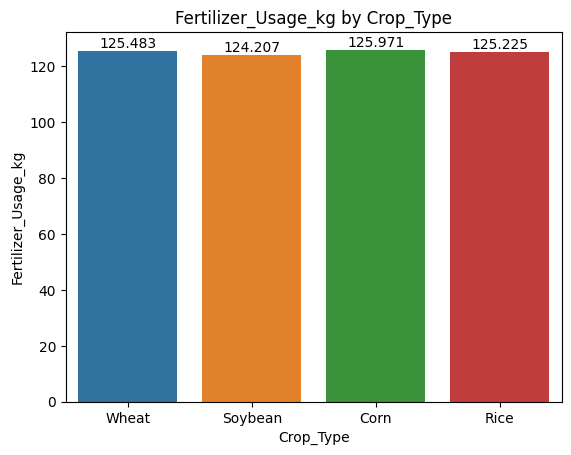

In [4]:
ax = sns.barplot(farmer_df,y = 'Fertilizer_Usage_kg', x='Crop_Type', hue = 'Crop_Type', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Fertilizer_Usage_kg by Crop_Type")
plt.show()

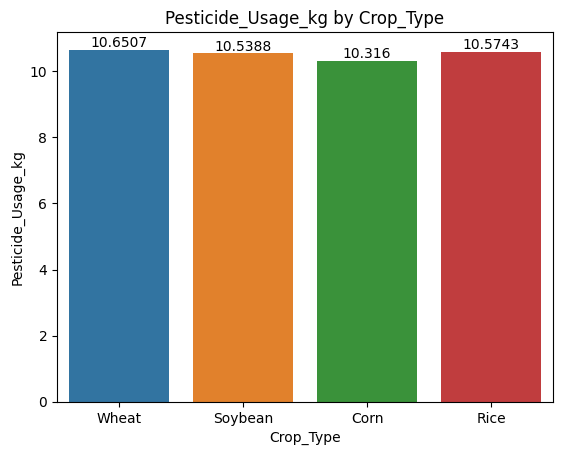

In [10]:
ax = sns.barplot(farmer_df,y = 'Pesticide_Usage_kg', x='Crop_Type', hue = 'Crop_Type', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Pesticide_Usage_kg by Crop_Type")
plt.show()

In [6]:
market_df['demand_diff'] = market_df.apply(lambda row: (row.Demand_Index - row.Supply_Index), axis=1)
market_df['avg_market_price'] = market_df.apply(lambda row: (row.Market_Price_per_ton + row.Competitor_Price_per_ton)/2, axis=1)


In [7]:
market_df

,Market_ID,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Seasonal_Factor,Consumer_Trend_Index,demand_diff,avg_market_price
0,1,Rice,180.251212,196.085900,199.509124,300.549219,1.093636,28.474810,Medium,148.472131,-3.423224,240.400216
1,2,Rice,420.527970,188.452400,150.789483,492.097798,0.526307,70.978063,High,97.298888,37.662917,456.312884
2,3,Wheat,457.260398,171.179384,78.989326,323.003342,1.292393,80.853592,Low,131.113236,92.190058,390.131870
3,4,Soybean,237.179113,196.970677,50.464363,232.978384,0.627663,60.676069,Low,95.169417,146.506314,235.078748
4,5,Wheat,324.032925,113.165416,145.878647,312.428652,1.491255,45.379516,Low,130.297138,-32.713231,318.230789
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Soybean,461.784414,167.259003,173.254864,475.142179,1.469265,56.512910,Low,141.079361,-5.995861,468.463296
9996,9997,Wheat,206.063654,165.032651,108.840340,347.241575,0.538033,87.047845,High,70.043016,56.192311,276.652615
9997,9998,Rice,394.093541,129.124985,150.882638,496.836137,0.993171,99.346343,Medium,52.535276,-21.757653,445.464839
9998,9999,Wheat,398.055217,99.089530,125.555089,121.755148,1.120434,94.938699,High,142.802760,-26.465559,259.905183


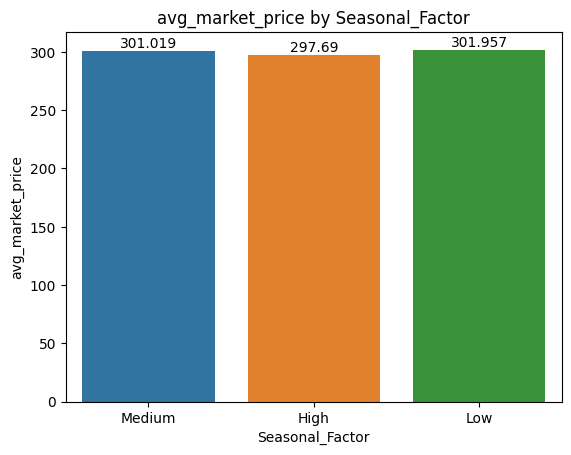

In [8]:
ax = sns.barplot(market_df,y = 'avg_market_price', x='Seasonal_Factor', hue = 'Seasonal_Factor', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"avg_market_price by Seasonal_Factor")
plt.show()

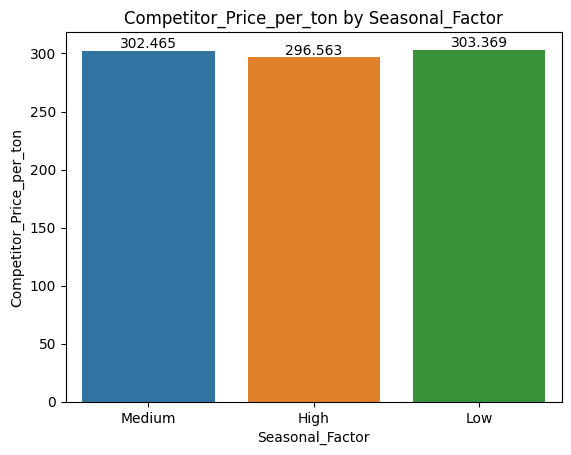

In [12]:
ax = sns.barplot(market_df,y = 'Competitor_Price_per_ton', x='Seasonal_Factor', hue = 'Seasonal_Factor', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Competitor_Price_per_ton by Seasonal_Factor")
plt.show()

In [ ]:
ax = sns.barplot(market_df,y = 'Market_Price_per_ton', x='Seasonal_Factor', hue = 'Seasonal_Factor', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Market_Price_per_ton by Seasonal_Factor")
plt.show()

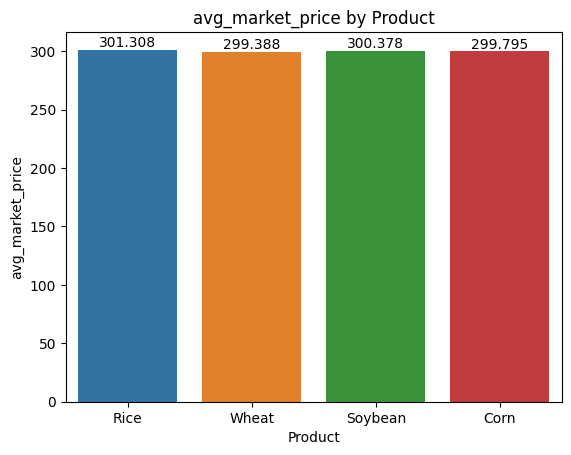

In [9]:
ax = sns.barplot(market_df,y = 'avg_market_price', x='Product', hue = 'Product', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"avg_market_price by Product")
plt.show()

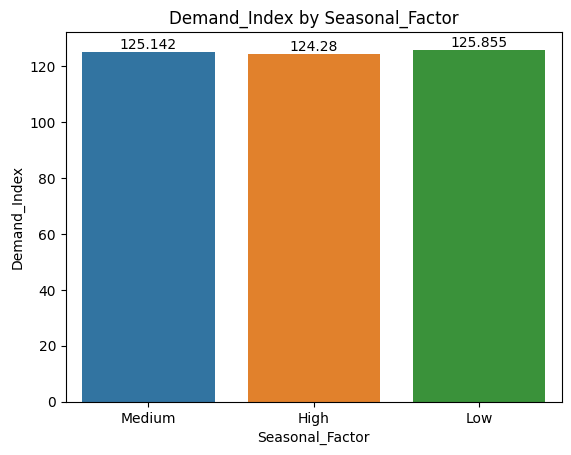

In [13]:
ax = sns.barplot(market_df,y = 'Demand_Index', x='Seasonal_Factor', hue = 'Seasonal_Factor', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Demand_Index by Seasonal_Factor")
plt.show()

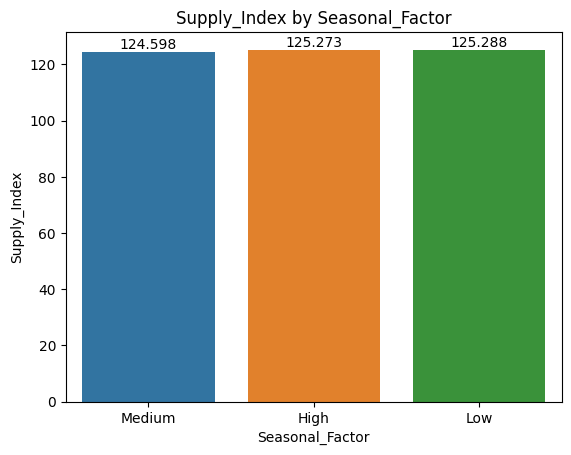

In [14]:
ax = sns.barplot(market_df,y = 'Supply_Index', x='Seasonal_Factor', hue = 'Seasonal_Factor', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Supply_Index by Seasonal_Factor")
plt.show()

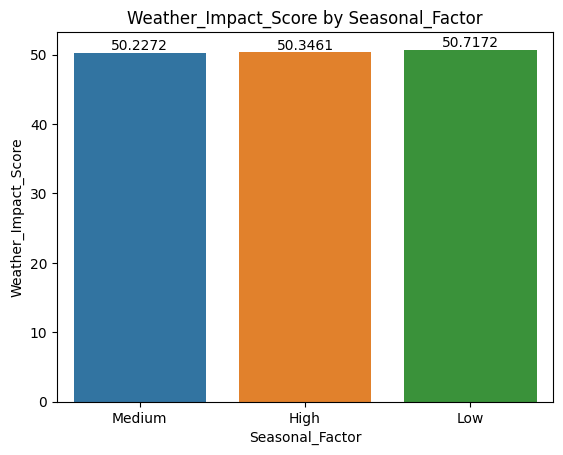

In [15]:
ax = sns.barplot(market_df,y = 'Weather_Impact_Score', x='Seasonal_Factor', hue = 'Seasonal_Factor', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Weather_Impact_Score by Seasonal_Factor")
plt.show()

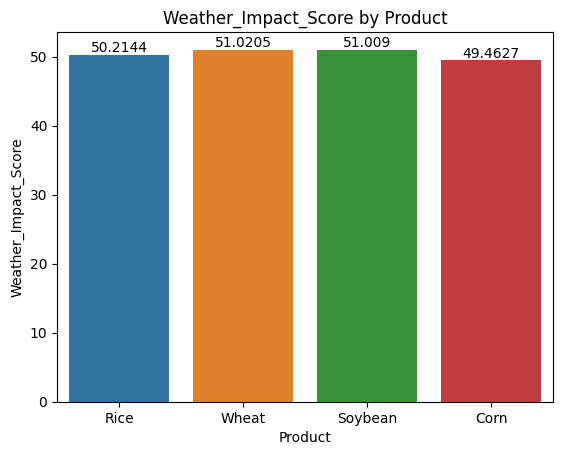

In [16]:
ax = sns.barplot(market_df,y = 'Weather_Impact_Score', x='Product', hue = 'Product', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Weather_Impact_Score by Product")
plt.show()

<Axes: xlabel='Sustainability_Score', ylabel='Crop_Yield_ton'>

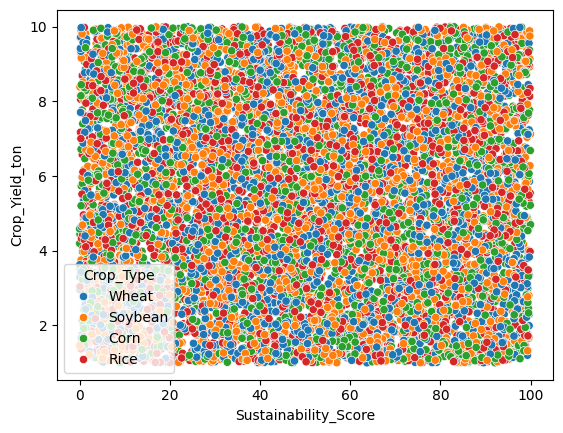

In [20]:
sns.scatterplot(farmer_df, x = 'Sustainability_Score',y = "Crop_Yield_ton", hue='Crop_Type')